In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle (1).json to kaggle (1).json


In [3]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d shayanfazeli/heartbeat

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
 81% 80.0M/98.8M [00:00<00:00, 142MB/s]
100% 98.8M/98.8M [00:00<00:00, 143MB/s]


In [4]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [5]:
import pandas as pd
df=pd.read_csv('/content/mitbih_train.csv',header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


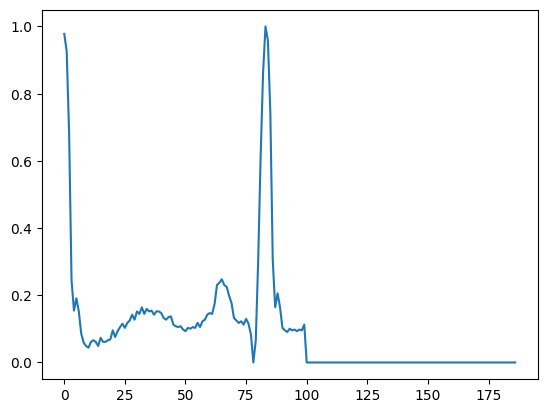

In [7]:
import matplotlib.pyplot as plt
plt.plot(df.iloc[0][:-1])

In [8]:
y_data=df.iloc[:,-1]
x_data=df.iloc[:,:-1]

In [9]:
(y_data.shape,x_data.shape)

((87554,), (87554, 187))

In [10]:
y_data.value_counts()

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

<BarContainer object of 5 artists>

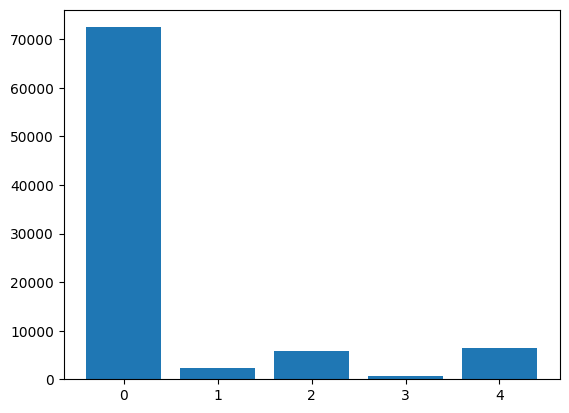

In [11]:
import matplotlib.pyplot as plt
plt.bar(y_data.value_counts().index,y_data.value_counts())

In [12]:
y_data=y_data.astype(int)

In [13]:
y_data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 87554 entries, 0 to 87553
Series name: 187
Non-Null Count  Dtype
--------------  -----
87554 non-null  int64
dtypes: int64(1)
memory usage: 684.1 KB


In [14]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 187 entries, 0 to 186
dtypes: float64(187)
memory usage: 124.9 MB


In [15]:
from sklearn.decomposition import PCA

In [16]:
x_data_2=PCA(n_components=.95).fit_transform(x_data)

In [17]:
x_data_2=pd.DataFrame(x_data_2)

In [18]:
x_data_2.describe()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
count,8.755400e+04,8.755400e+04,8.755400e+04,8.755400e+04,8.755400e+04,8.755400e+04,8.755400e+04,8.755400e+04,8.755400e+04,8.755400e+04,...,8.755400e+04,8.755400e+04,8.755400e+04,8.755400e+04,8.755400e+04,8.755400e+04,8.755400e+04,8.755400e+04,8.755400e+04,8.755400e+04
mean,-1.038781e-17,5.518526e-18,-1.038781e-17,-2.077563e-17,7.790861e-18,1.298477e-17,-7.141622e-18,5.193907e-18,-3.895430e-18,7.790861e-18,...,4.869288e-19,5.843146e-18,-6.492384e-19,8.115480e-19,1.022550e-17,2.077563e-17,1.817868e-17,-1.947715e-18,1.671789e-17,-3.246192e-18
std,1.667895e+00,8.256434e-01,6.759259e-01,5.092127e-01,4.194550e-01,3.904525e-01,3.679462e-01,3.597087e-01,3.486024e-01,3.236660e-01,...,1.755734e-01,1.706308e-01,1.629979e-01,1.573863e-01,1.507529e-01,1.466530e-01,1.434967e-01,1.389846e-01,1.337677e-01,1.300269e-01
min,-2.619234e+00,-3.208448e+00,-2.482604e+00,-1.764752e+00,-2.037322e+00,-1.552850e+00,-1.379123e+00,-1.404679e+00,-1.647278e+00,-1.323947e+00,...,-7.020675e-01,-5.835353e-01,-8.485959e-01,-6.678040e-01,-9.101735e-01,-6.777472e-01,-8.296385e-01,-6.160531e-01,-4.774786e-01,-5.313051e-01
25%,-1.258860e+00,-5.489468e-01,-4.813684e-01,-3.766264e-01,-2.592507e-01,-2.811951e-01,-2.713411e-01,-2.293972e-01,-2.141957e-01,-2.221225e-01,...,-1.189375e-01,-1.230429e-01,-1.045072e-01,-1.037740e-01,-9.335937e-02,-9.806102e-02,-8.928152e-02,-9.269917e-02,-8.757089e-02,-8.078946e-02
50%,-4.372349e-01,9.894435e-03,1.732891e-02,-3.230818e-02,-6.375233e-02,-5.149681e-02,-6.625810e-03,8.796436e-03,-1.625878e-02,-1.894661e-02,...,-8.628126e-03,2.636710e-03,-6.430736e-03,6.925247e-03,-7.227841e-03,1.221720e-03,3.342531e-03,3.519577e-03,1.085823e-03,-9.810312e-05
75%,7.432805e-01,5.331369e-01,5.400545e-01,3.508541e-01,2.145376e-01,2.710953e-01,2.363912e-01,2.542254e-01,2.092833e-01,2.201430e-01,...,1.200937e-01,1.164071e-01,1.093079e-01,9.625143e-02,9.466999e-02,9.444060e-02,8.841250e-02,9.152073e-02,8.796427e-02,8.255830e-02
max,7.412055e+00,4.773607e+00,3.161300e+00,2.170492e+00,3.321965e+00,1.617871e+00,1.586129e+00,1.561624e+00,2.560596e+00,1.580702e+00,...,8.443488e-01,7.370325e-01,9.443230e-01,9.262595e-01,9.796828e-01,8.136258e-01,9.253416e-01,7.142743e-01,7.398305e-01,5.366672e-01


In [19]:
x_data_2.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-1.300214,-0.003410,0.606018,0.745096,-0.226768,-0.145488,0.692298,-0.349425,0.349320,-0.341987,...,-0.023288,-0.110989,0.006424,0.094436,-0.079056,-0.029466,-0.040376,-0.019054,0.036656,-0.032184
1,-1.436884,0.604471,-0.569402,-0.413966,-0.194302,-0.380073,0.079079,-0.016559,-0.157483,-0.499933,...,0.487654,0.210623,0.053652,-0.223977,-0.017034,0.109435,-0.067233,-0.050627,0.158612,0.247905
2,-1.720580,-0.075125,-0.245855,0.075545,-0.677761,-0.350730,0.207186,-0.363509,0.383327,-0.029950,...,-0.207328,-0.030748,0.128333,-0.027742,-0.112568,-0.118012,-0.222928,0.058577,0.084418,-0.105083
3,-1.509363,-0.044757,0.349790,0.618420,-0.234009,-0.616890,0.102943,-0.205053,0.893421,0.133068,...,-0.182457,0.296583,-0.064588,-0.093252,0.060913,0.072307,0.049325,0.052369,-0.046158,0.019927
4,-1.181010,1.019874,-0.778794,-0.607392,-0.055837,-0.127393,0.542517,-0.036565,0.053350,-0.575636,...,-0.016209,0.371836,0.077667,0.093516,-0.226620,0.063923,-0.001338,-0.120484,-0.125088,0.045461


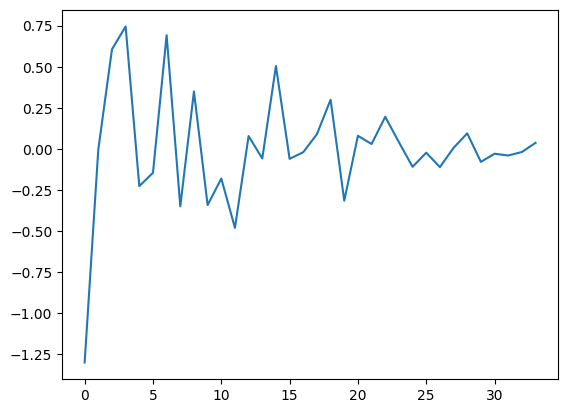

In [20]:
plt.plot(x_data_2.iloc[0][:-1])

In [21]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN


In [22]:
desired_count = 6000
y_data.value_counts()

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

In [23]:
rus=RandomOverSampler(sampling_strategy={1:6000,3:6000}, random_state=42)
#ros = SMOTEENN(sampling_strategy={0:40000,3:10000,2:15000}, random_state=42)
smo=SMOTE(random_state=42)

In [24]:
x_data_3,y_data_3=smo.fit_resample(x_data_2,y_data)

In [25]:
x_data_2,y_data=rus.fit_resample(x_data_2,y_data)

In [26]:
y_data_3.value_counts()

187
0    72471
1    72471
2    72471
3    72471
4    72471
Name: count, dtype: int64

In [27]:
y_data.value_counts()

187
0    72471
4     6431
1     6000
3     6000
2     5788
Name: count, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,r2_score,f1_score,classification_report

In [29]:
train_x,test_x,train_y,test_y=train_test_split(x_data_2,y_data,test_size=0.2)
train_x_3,test_x_3,train_y_3,test_y_3=train_test_split(x_data_3,y_data_3,test_size=0.2)

In [30]:
dt1=DecisionTreeClassifier()


In [31]:
dt2=DecisionTreeClassifier()

In [32]:
dt1.fit(train_x,train_y)

DecisionTreeClassifier()

In [ ]:
dt2.fit(train_x_3,train_y_3)

In [ ]:
classification_report(test_y,dt1.predict(test_x))

In [ ]:
classification_report(test_y_3,dt2.predict(test_x_3))

In [ ]:
f1_score(test_y,dt1.predict(test_x),average='macro')

In [ ]:
accuracy_score(test_y,dt1.predict(test_x))

In [ ]:
r2_score(test_y,dt1.predict(test_x))

In [ ]:
f1_score(test_y_3,dt2.predict(test_x_3),average='macro')

In [ ]:
r2_score(test_y_3,dt2.predict(test_x_3))

In [ ]:
accuracy_score(test_y_3,dt2.predict(test_x_3))